In [25]:
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, repeat, pack, unpack
import math
import random
import torch

In [3]:
#Load Data
from torchvision import datasets
from torchvision import transforms as torchTransforms
pilTransform = torchTransforms.Compose([torchTransforms.PILToTensor()])
mnist = datasets.MNIST('./data', train=True, download=False)


In [4]:
#Task1 - Randomly assemble subset
randomIdxs=random.sample(range(60000),1000)
imagesSubset=mnist.data[randomIdxs]
targetsSubset=mnist.targets[randomIdxs]

In [5]:
#Check subsetting
print(imagesSubset.shape)

torch.Size([1000, 28, 28])


In [6]:
#Check subsetting
print(targetsSubset.shape)

torch.Size([1000])


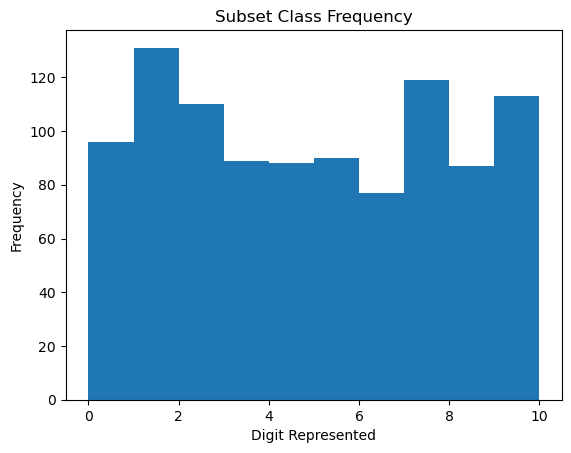

In [11]:
#Task 2
histArray=targetsSubset.numpy()
#Break into 10 discrete bins
binList=[i for i in range(11)]
plt.hist(histArray,binList)
plt.title('Subset Class Frequency')
plt.xlabel('Digit Represented')
plt.ylabel('Frequency')
plt.show()


In [8]:
#Task 3 - Make batches of size 25
batchedSet=rearrange(imagesSubset, '(b1 b2) h w -> b1 b2 h w', b2=25)
print(batchedSet.shape)


torch.Size([40, 25, 28, 28])


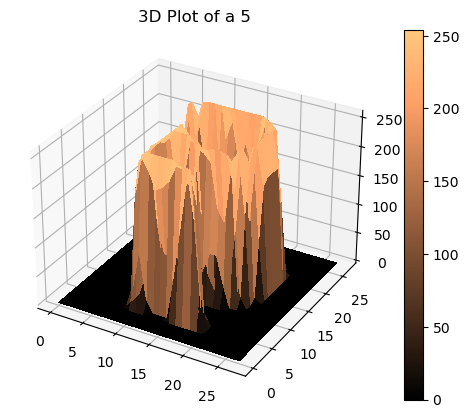

In [86]:
#Task 4
idx = np.random.randint(0, len(imagesSubset))
img2plot=imagesSubset[idx].numpy()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(0, 28, 1)
Y = np.arange(0, 28, 1)
X, Y = np.meshgrid(X, Y)
Z=img2plot
surf = ax.plot_surface(X, Y, Z, cmap='copper',linewidth=0, antialiased=False)
ax.set_zlim(0, 256)
fig.colorbar(surf)
titleName=str(targetsSubset[idx].numpy())
titleName="3D Plot of a " + titleName
plt.title(titleName)
plt.show()